¡Hola Yeray! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripcipción del proyecto

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Felicitaciones Yeray, has implementado los cambios que te he indicado, bien hecho! Hemos alcanzado los objetivos del proyecto por lo que está en condiciones de ser aprobado!
    
Felicitaciones y éxitos en tu camino dentro del mundo de los datos!
    
Saludos!

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Yeray, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programando ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser mejor como  Data Scientist"
    
Ahora si yendo a esta notebook. Yeray porque has logrado resolver todos los pasos implementando grandes lógicas, se ha notado tu manejo sobre python y las herramientas ML utilizadas. Muy bien hecho! Por otro lado hemos tenido un par de detalles que debemos corregir pero que estoy seguro que te demorara unos minutos, te he dejado los comentarios con el contexto necesario para que puedas resolverlo.

Éxitos y espero con ansias a nuestra próxima iteración!

Saludos!

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math
import re

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
#busqueda de existencia de duplicados
print(df_reviews.duplicated().sum())

0


In [7]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>
    
Excelente Yeray, hasta el momento hemos cargado correctamente los datos separandolos de las importaciones para mitigar posibles errores, a la vez has implementado métodos para comprender la composición de nuestros datos. Bien hecho!

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

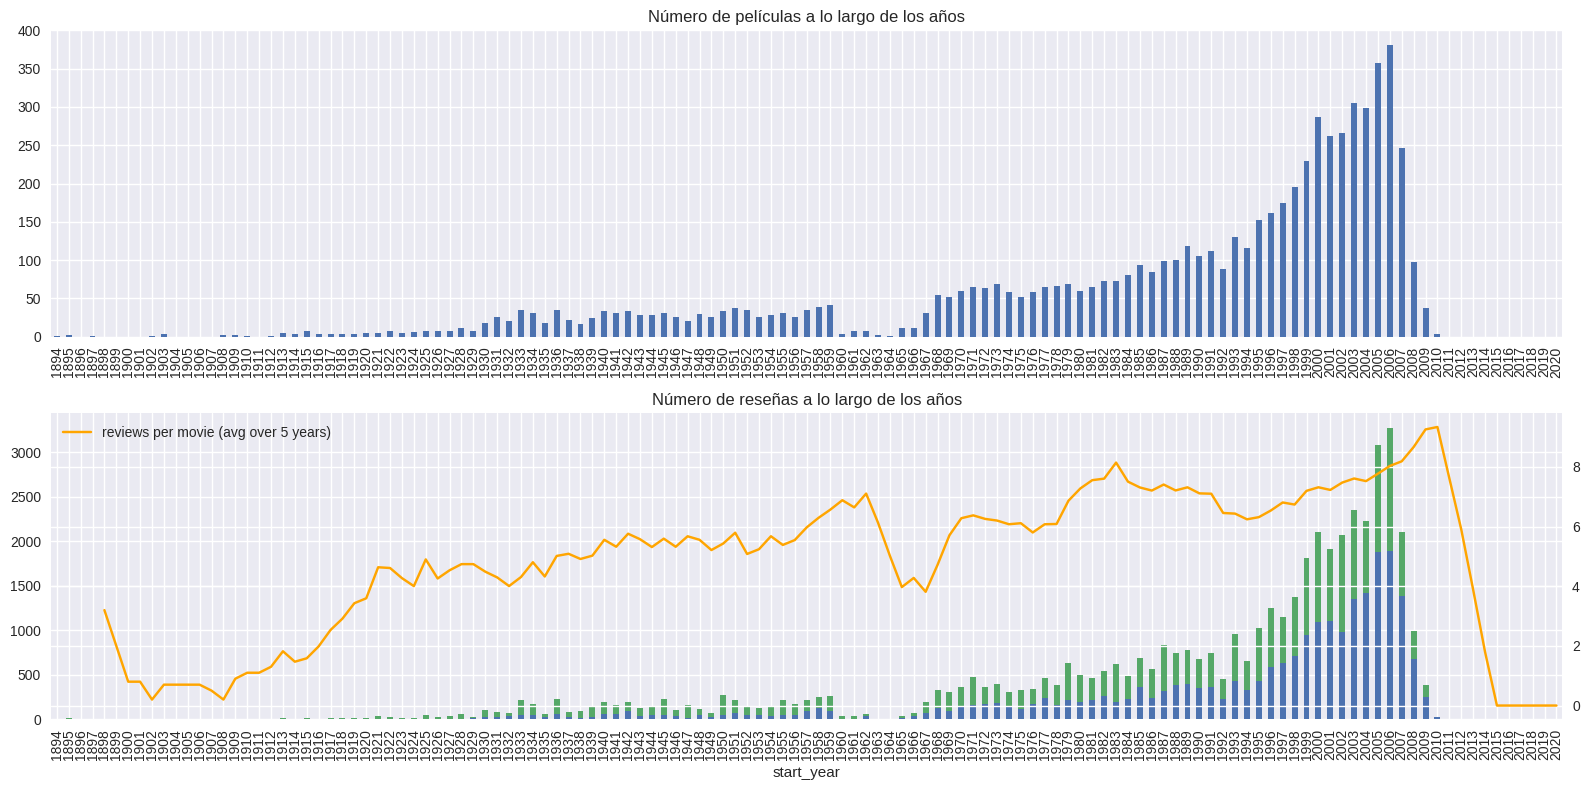

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Unas observaciones que nos permitirán comprender el trabajo que debemos realizar. Excelente.

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

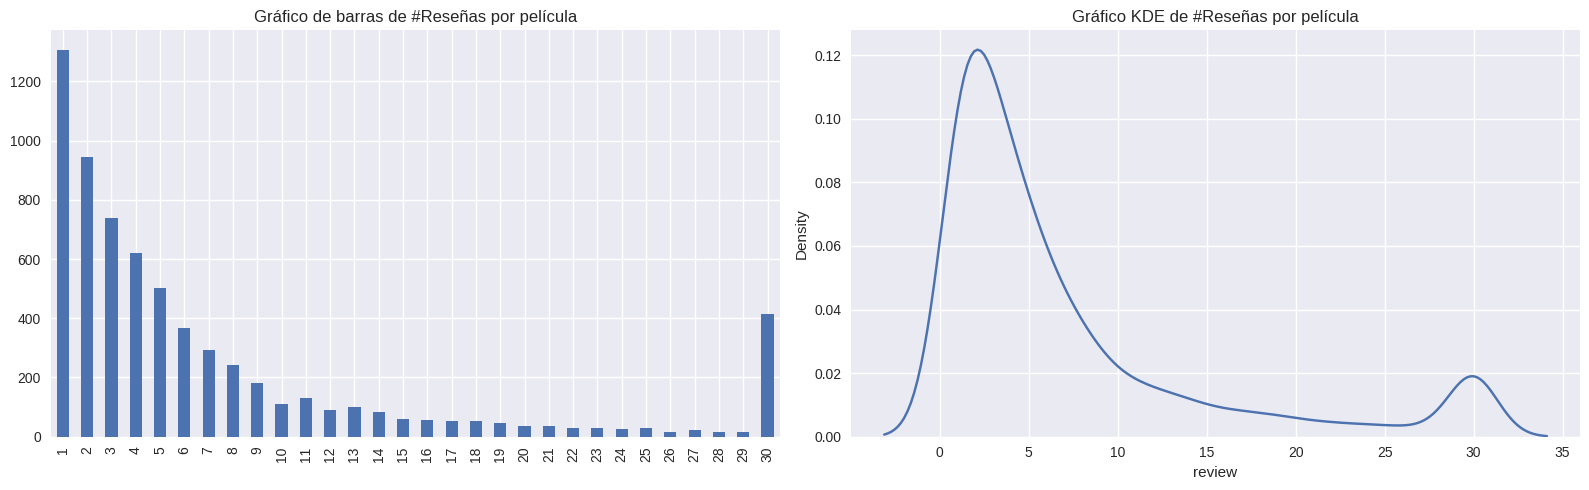

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

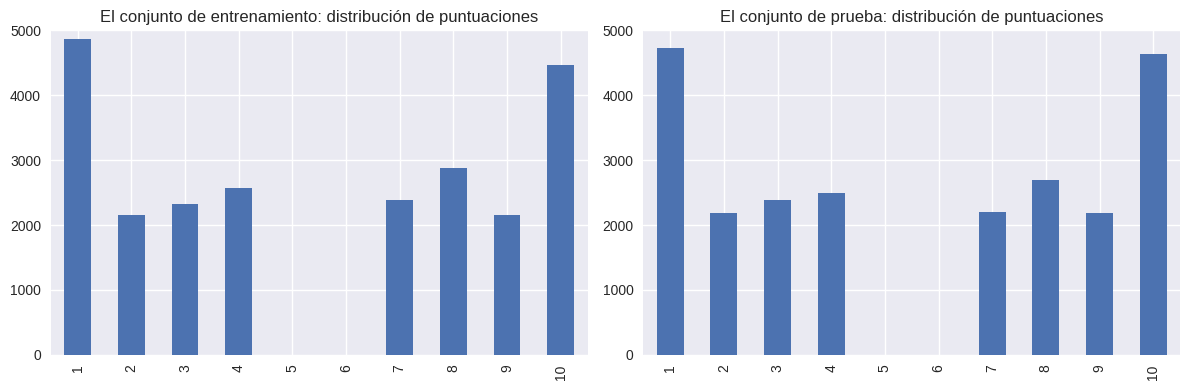

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente análisis sobre la distribución de nuestras reseñas Yeray!

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


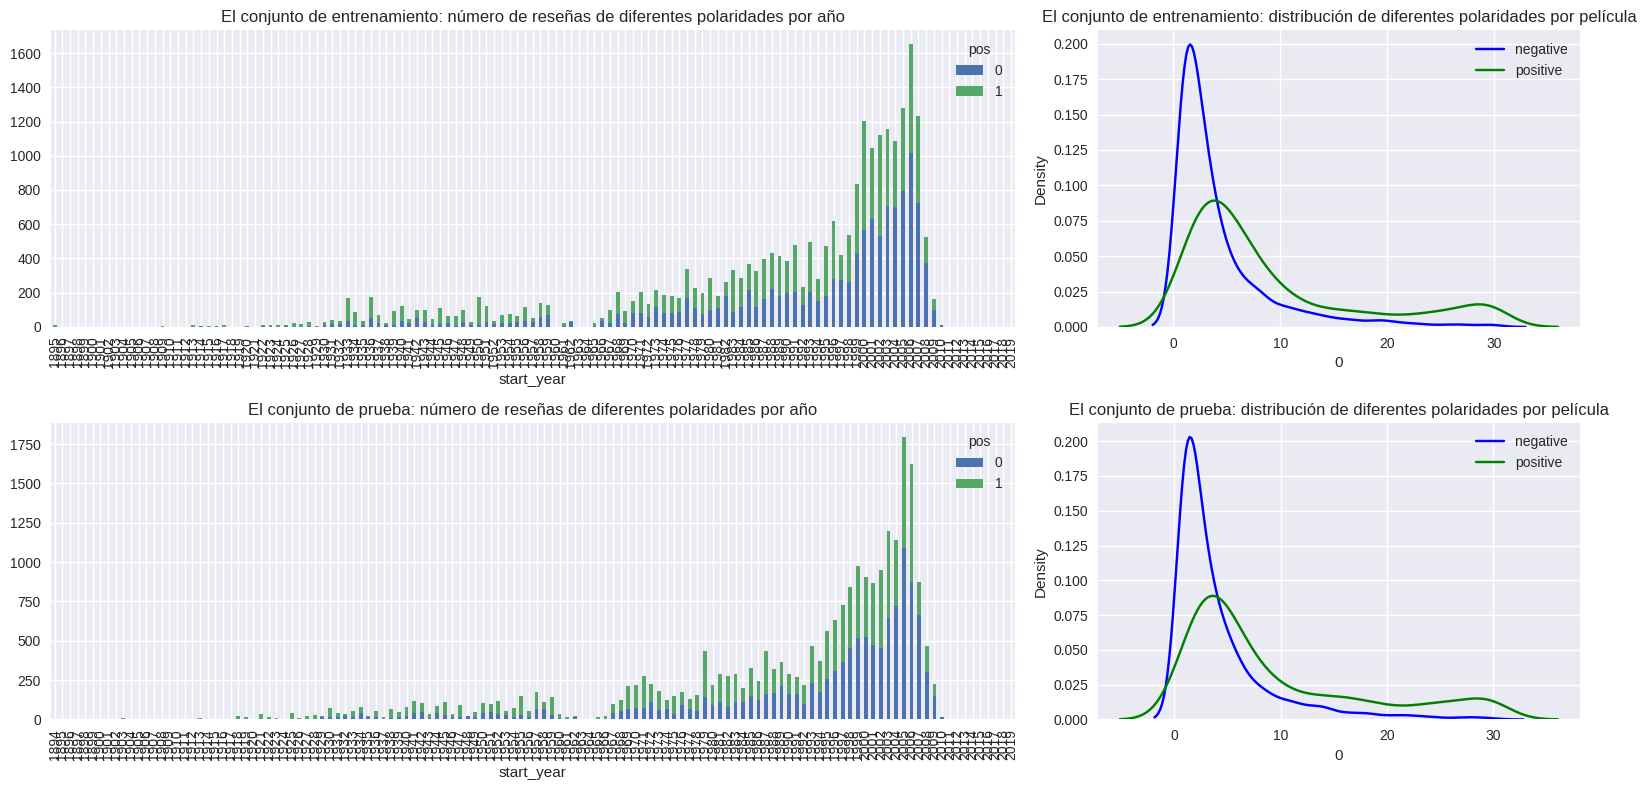

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

    
Nuevamente excelente! Continuamos el proceso de comprensión de los datos y del problema.

## Conclusion sobre el desequilibrio de clases 
Como podemos observar en la graficas desarrollas que se realizaron para poder comprabar como se han relizado la distribucion de los reseñas que se hacen por las peliculas, podemos tomar en cuenta que exsiten empezo a existir un gran numero de reseñas en depuesde los años 2000 en la cual podemo de notar, que existe un cantidad de casi 100 reseñar que son negativas. por los graficos podemos denotar que nuestro modelos puede tener un desquilibrio por la clases "Negativa" por la existencia de mas valores en ellega tiene a tener mayor desidada en los reseñas de la peliculas, aun que podemos denotar que las clase "positiva"
mayor dispersion

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
df_reviews['review_norm'] = df_reviews['review'].apply(lambda x: re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', x.lower())))

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

    
Excelente creación de las funciones a cargo de la limpieza y una gran aplicación sobre nuestro corpus.

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

train_features = df_reviews_train.drop('pos',axis=1)
test_features = df_reviews_test.drop('pos',axis=1)

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Partimos los datos en los conjuntos de entrenamiento y testeo. Bien! Sigamos!

## Trabajar con modelos

### Modelo 0 - Constante

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
model_0 = DummyClassifier(strategy='constant', constant=1,)
model_0.fit(train_features,train_target)

DummyClassifier(constant=1, strategy='constant')

           train  test
Exactitud    NaN   NaN
F1          0.67  0.67
APS         0.50  0.50
ROC AUC     0.50  0.50


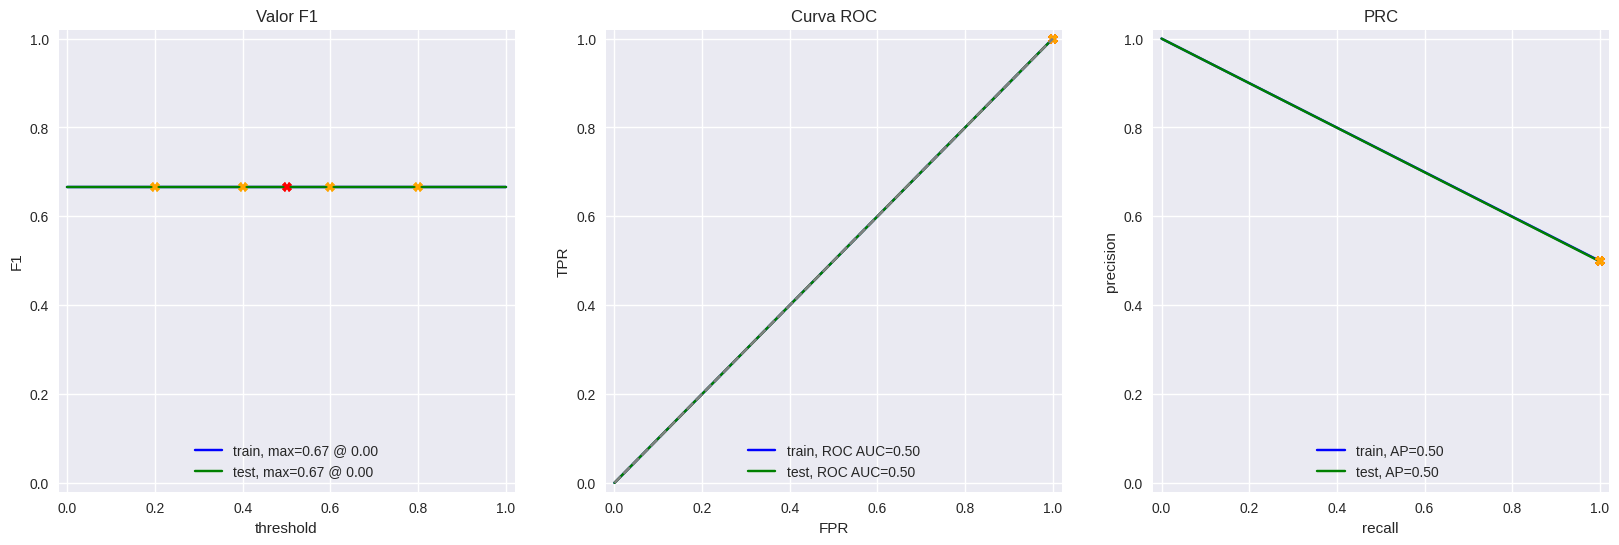

In [18]:
evaluate_model(model_0,train_features,train_target,test_features,test_target)

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a><br>
  Agregacion de los Hiperparamtros al modelo 
</div>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí la estructura es correcta Yeray, sin embargo debemos corregir unos detalles. El querer un modelo constante nos indica que debemos aplicar el hiperparamtri strategy y su valor **constant**, a la vez esto nos implicar+ia agregar el parametro **cosntant=1**. una vez agreguemos estos parametros veremos los resultados correctos.

<div class="alert alert-block alert-success">

    
<b>Comentario del revisor. (Iteración 2)</b> <a class="tocSkip"></a>

Excelente implementación de lo solicitado Yeray! Bien hecho!


### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [19]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [22]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Descargar los recursos necesarios
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenización y lematización
lemmatizer = WordNetLemmatizer()

stop_words= set(stopwords.words('english'))

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text, language='english')
    lemas = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words and token.isalpha()]
    return ' '.join(lemas)



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Error downloading 'omw-1.4' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/omw-1.4.zip>:   [Errno 13]
[nltk_data]     Permission denied:
[nltk_data]     '/home/jovyan/nltk_data/corpora/omw-1.4.zip'


In [23]:
df_reviews_train['review_lemms'] = df_reviews_train['review_norm'].apply(tokenize_and_lemmatize)
df_reviews_test['review_lemms']= df_reviews_test['review_norm'].apply(tokenize_and_lemmatize)

In [ ]:
train_corpus = df_reviews_train['review_lemms']
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stop_words)
tf_idf = tfidf_vectorizer_1.fit_transform(train_corpus)

In [ ]:
train_features_1 = tf_idf
test_corpus = df_reviews_test['review_lemms']
test_features_1 = tfidf_vectorizer_1.transform(test_corpus)

In [ ]:
model_1=LogisticRegression()
model_1.fit(train_features_1,train_target)

In [ ]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a><br>
  Se realizo la tokenizacion y la lemmas con NLTK para el entrenamiento de este modelo
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

    
Aquí el procedimiento es muy correcto Yeray, has implementado tanto la normalización somo el filtrado de stopwords y el vecotirzados, felicitaciones! Sin embargo que el procedimiento correcto debe ser implementando una tokenización y obteniendo los lemmas correspondientes, investiga y utiliza nltk para aplicar esto al corpus de datos.
    
    Excelente!

### Modelo 3 - spaCy, TF-IDF y LR

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [ ]:
df_reviews['review_lemm'] = df_reviews['review_norm'].apply(text_preprocessing_3)

In [ ]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

In [ ]:
train_corpus =df_reviews_train['review_lemm']
stop_words = set(stopwords.words('english'))
tfidf_vectorizer_3= TfidfVectorizer(stop_words=stop_words)
tf_idf = tfidf_vectorizer_3.fit_transform(train_corpus)

features_train_3 = tf_idf
features_test_3 = tfidf_vectorizer_3.transform(test_corpus)

model_3 = LogisticRegression()
model_3.fit(features_train_3,train_target)

In [ ]:
evaluate_model(model_3, features_train_3, train_target, features_test_3, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí lo has hecho perfecto Yeray, hemos cumplido con todos los paso y utilizado spacy como debíamos, felicitaciones!

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model_4 = LGBMClassifier(num_leaves=31, max_depth=5, learning_rate=0.05, n_estimators=100)
model_4.fit(features_train_3,train_target)

In [ ]:
evaluate_model(model_4, features_train_3, train_target, features_test_3, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente un proceso correcto reutilizando nuestros datos, bien hecho

###  Modelo 9 - BERT

In [ ]:
import torch
import transformers

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [ ]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # Texto al id de relleno de tokens junto con sus máscaras de atención
    for text in texts:
        # Tokenizar cada texto
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,  # BERT no puede manejar más de 512 tokens
            truncation=True,
            padding='max_length',  # Rellenar hasta la máxima longitud permitida
            return_attention_mask=True
        )

        ids = encoded['input_ids']
        attention_mask = encoded['attention_mask']

        # Añadir a las listas
        ids_list.append(ids)
        attention_mask_list.append(attention_mask)
    
    # Configurar el dispositivo
    if force_device == 'cuda' and torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
    
    # Mover el modelo al dispositivo adecuado
    model.to(device)
    
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # Obtener embeddings en lotes
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list) / batch_size)), disable=disable_progress_bar):
        ids_batch = torch.LongTensor(ids_list[batch_size * i: batch_size * (i + 1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size * i: batch_size * (i + 1)]).to(device)
        
        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        
        # Obtener el embedding del token [CLS] (primer token)
        embeddings.append(batch_embeddings.last_hidden_state[:, 0, :].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [ ]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

In [ ]:
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

In [ ]:
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

In [ ]:
model_9 = LogisticRegression()
model_9.fit(train_features_9,train_target)

In [ ]:
evaluate_model(model_9, train_features_9, train_target, test_features_9 , test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Felicitaciones por dedcidir aplicar este modelo Yeray, si bien era opcional has decidido intenrlo y lo has hecho muy bien. Bert es una red avanzada y de gran peso, es por esta razón que no es tan sencillo correrlo en un entorno local cont tantas observaciones ya que por lo normal los dispositivos no lo soportan. Bert es una arquitectura normalmente corrida en gpu por lo que podriamos hacer uso de Google Colab que nos provee una gratis.

## Conclusion Respesto a los modelos entrenados a base los resultado evluacion de modelo

los modelos 1,3,4: Realmente dieron sultados bastante igauales se puede decir que cierto modos, aun que cado uno con una diferentes precision, los 3 modelos bastante bueno. pero si tendriamos que definir uno diria que el modelos en el cual es Modelo 1 - NLTK, TF-IDF y LR dado que los resultados en la graficas casi llegan a tener un modelos super excelente dado que los valor que tiene esta mas cerca 1 en cada uno de prueba para medir el modelos que fueron las de F1,ROC,PRC.

Modelo BERT- cada vez lo intento ejecutar se muere el kernel

## Mis reseñas

In [ ]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', x.lower())))

my_reviews

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelentes Reviews Yeray!

### Modelo 1

In [ ]:
texts = my_reviews['review_norm']


my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 3

In [ ]:
texts = my_reviews['review_norm']
my_reviews['review_lemm'] = my_reviews['review_norm'].apply(text_preprocessing_3)


my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(my_reviews['review_lemm']))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 4

In [ ]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 9

In [ ]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Implementaciones y resultados perfectos Yeray! Bien hecho!

## Conclusiones

Para en este caso tomaremos en cuenta los modelos de 1,3,4. dado que el modelos 0 no cumplia con los paramtreo de la metricas y en el caso del modelo 9 BERT este no se logro entrenar dado que cada vez se ejecutaba el kernel se moria.

Pero para esta conclusion de estos modelos podemos decir que modelos que mas acercaron a la predicion de sentimiento de las reseñas fuerin los modelos 1 ,3 dado que si lograba dectectar de forma acertada que llega emitir las reseñas con las probabilidades sea positiva. solo en la reseña numero 4 era en la cual las dos fallan de igual forma dado considero que ese reseña debio tener un poco mas de probabilidad de sea positivo 

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Una conclusión que demuestra la comprensión de lo hecho a lo largo del trabajo, bien hecho Yeray! Destaco tu compromiso no solo en esta conclusión final sino en aquellas intermedias durante el trabajo, a nivel general lo has hecho excelente!

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 